## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.

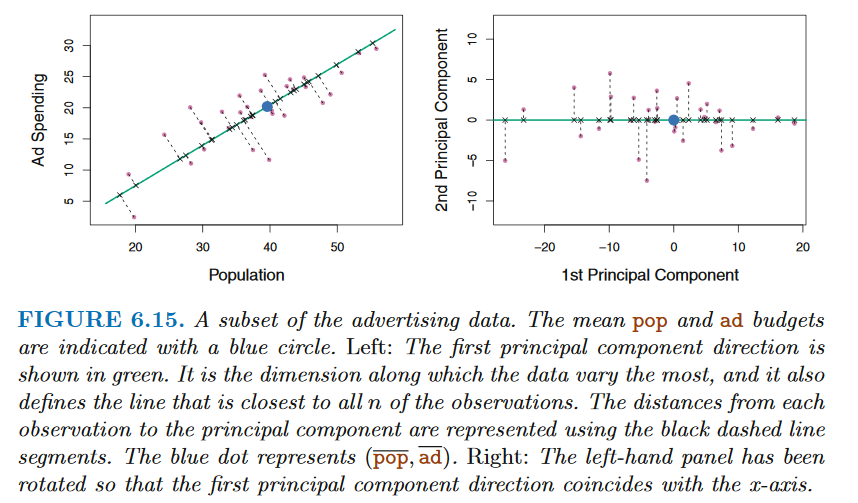

In [1]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)
#en azul se muestra los presupuestos medios de pop y anuncios

#GRAFICO IZQUIERDA

#direccion del primer componente principal se muestra en verde
#es la dimension en la que mas varian los datos, y tambien define la linea mas cercana a todas las n observaciones
#las distancias de cada observacion al componente principal se representan utilizando los segmentos de linea 
#discontinua negra.
#el punto azul representa la media de (pop,ad)

#GRAFICO DERECHA

#el grafico de la izquierda se ha girado para que la direccion del primer componente principal coincida con el eje
#x

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


###### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [2]:
data("USArrests")
head(USArrests, 10)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

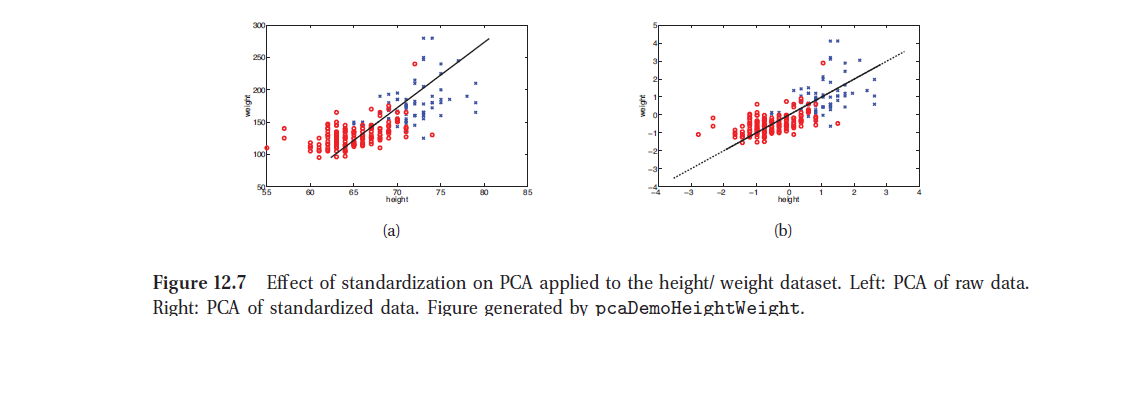

In [3]:
display_png(file="figura2.png")

In [4]:
# calcula varianzas para cada variable
apply(USArrests,2,var)
apply(USArrests,2,mean)


Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Una posibilidad es estandarizar las variables:

In [5]:
# escalando los datos
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)
apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
-7.663087e-17  1.112408e-16 -4.332808e-16  8.942391e-17

Sin embargo, no siempre el escalado es  deseable. Un ejemplo sería si cada variable en el conjunto de datos tuviera las mismas unidades y el analista deseara capturar esta diferencia en la varianza para sus resultados. Dado que Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, esto puede ser razonable dependiendo de cómo quiera interpretar los resultados. Pero como UrbanPop se mide como un porcentaje de la población total, no tendría sentido comparar la variabilidad de UrbanPop con el asesinato, el asalto y la violación.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA también dependerán de si las variables se han escalado individualmente.

In [6]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
arrests.cov <- cov(scaled_df) #covarianza
arrests.eigen <- eigen(arrests.cov) #valores propios y vectores propios
arrests.eigen

eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
           [,1]       [,2]       [,3]        [,4]
[1,] -0.5358995  0.4181809 -0.3412327  0.64922780
[2,] -0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] -0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] -0.5434321 -0.1673186  0.8177779  0.08902432


In [7]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


In [8]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

State,PC1,PC2
Alabama,0.9756604,-1.1220012
Alaska,1.9305379,-1.0624269
Arizona,1.7454429,0.7384595
Arkansas,-0.1399989,-1.1085423
California,2.4986128,1.5274267
Colorado,1.4993407,0.9776297


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


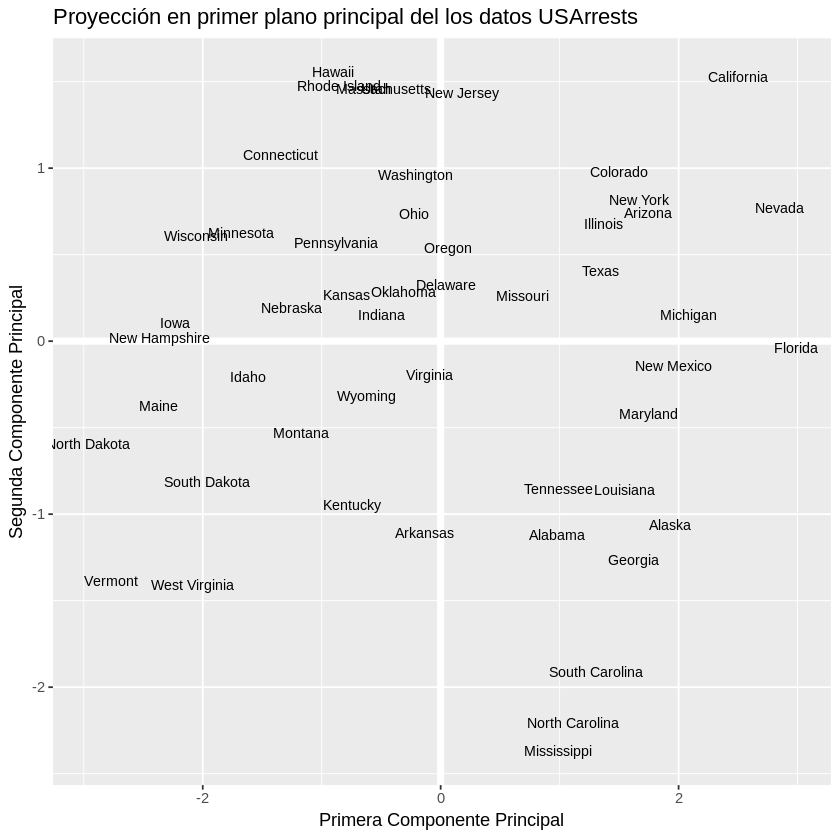

In [9]:
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

#### Selección del número de componentes principales

Como ya se ha mencionado el PCA reduce la dimensionalidad al mismo tiempo que explica la mayor parte de la variabilidad, pero existe un método más técnico para medir exactamente qué porcentaje de la varianza se mantuvo en estos componentes principales.

La proporción de varianza explicada (PVE) por la m-ésima componente principal se calcula utilizando la ecuación:
$$PVE = \frac{\sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{\sum_{i=1}^n \sum_{j=1}^d {x_{ij}}^2}$$

De los cálculos previos se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

In [10]:
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0,62 0,25 0,09 0,04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

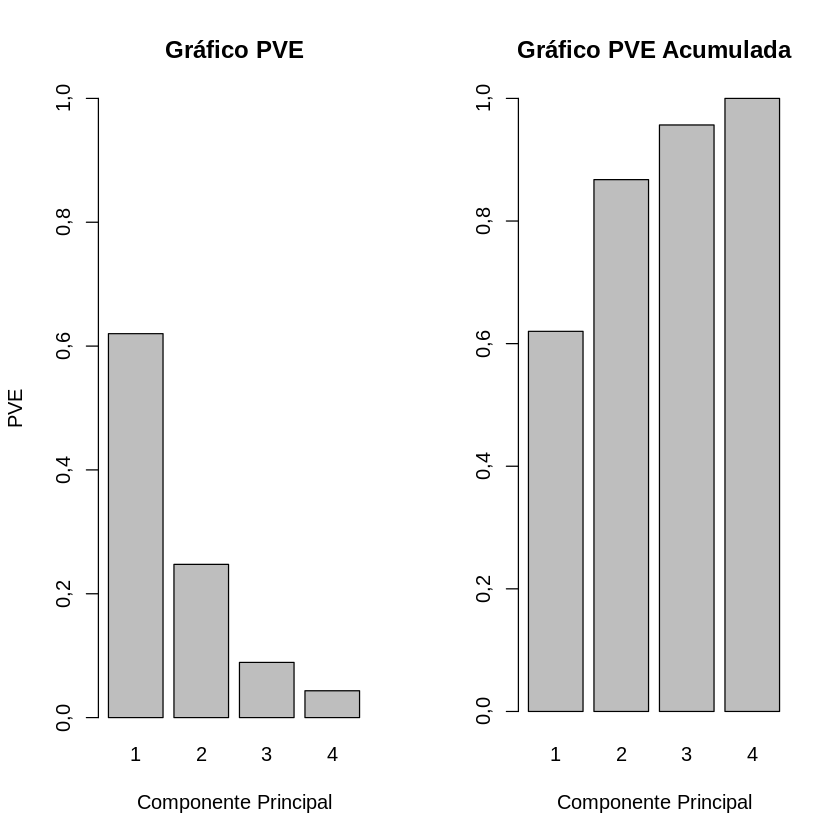

In [11]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


## Ahora con las funciones predefinidas en R

In [148]:
pca_res <- prcomp(USArrests, scale = TRUE) # prcomp centra variables para que tenga media cero, con scale = true se
                                           # busca que la desviacion estandar sea de uno
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1,5748783 0,9948694 0,5971291 0,4164494

Murder  Assault UrbanPop     Rape 
   7,788  170,760   65,540   21,232

Murder   Assault  UrbanPop      Rape 
 4,355510 83,337661 14,474763  9,366385

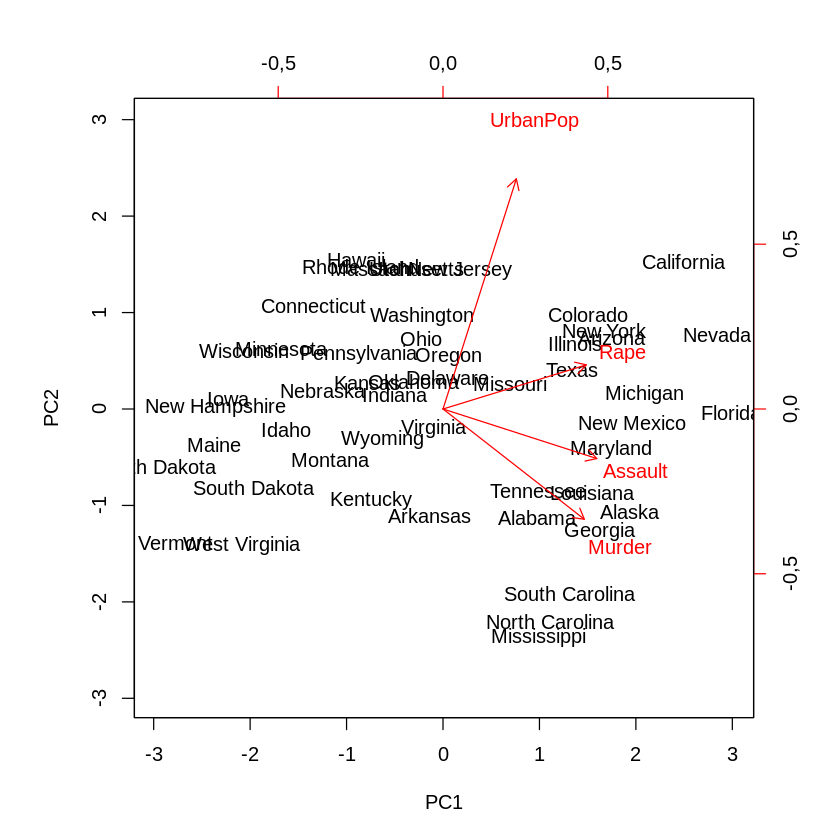

In [13]:
biplot(pca_res, scale = 0)

#### Ejercicio 2:
1. Explique como se relacionan variables y observaciones en este último gráfico. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. 
2. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 
3. Utilice la función predefinida en R princomp y compare con prcomp.


## ----------------------------------------------------------------------------------------------------------------------------

###  1) Respuesta

###  2) Respuesta

In [14]:
prcomp(USArrests, scale = TRUE) 

Standard deviations (1, .., p=4):
[1] 1,5748783 0,9948694 0,5971291 0,4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0,5358995  0,4181809 -0,3412327  0,64922780
Assault  -0,5831836  0,1879856 -0,2681484 -0,74340748
UrbanPop -0,2781909 -0,8728062 -0,3780158  0,13387773
Rape     -0,5434321 -0,1673186  0,8177779  0,08902432

Al observar las componentes que nos entrega la funcion prcomp de R podemos decir que cada componente nos otorga informacion acerca de que representan cada una de estas.


In [15]:
componentes = prcomp(USArrests, scale = TRUE)$rotation

#### Para la componente PC 1

In [16]:
componentes[,1]

Murder    Assault   UrbanPop       Rape 
-0,5358995 -0,5831836 -0,2781909 -0,5434321

De esta componente podemos observar que los pesos de las variables (Murder, Assault, Rape) son muy cercanos a 
comparacion de UrbanPop. De esto podemos decir que PC1 corresponde a la informacion entregada por los delitos en general

#### Para la componente PC 2

In [17]:
componentes[,2]

Murder    Assault   UrbanPop       Rape 
 0,4181809  0,1879856 -0,8728062 -0,1673186

De esta componente podemos observar que el peso de la variable UrbanPop esta muy por encima de las demas, por lo que podemos decir que PC2 corresponde mas a la informacion de la poblacion que vive en zonas urbanas

#### Para la componente PC 3

In [18]:
componentes[,3]

Murder    Assault   UrbanPop       Rape 
-0,3412327 -0,2681484 -0,3780158  0,8177779

De esta componente podemos observar que el peso de la variable Rape esta muy por encima de las demas, por lo que podemos decir que PC3 corresponde mas a la informacion entregada por los delitos de tipo Violacion

#### Para la componente PC 4

In [19]:
componentes[,4]

Murder     Assault    UrbanPop        Rape 
 0,64922780 -0,74340748  0,13387773  0,08902432

De esta componente podemos observar que el peso de la variable Murder esta muy por encima de las demas, por lo que podemos decir que PC4 corresponde mas a la informacion entregada por los delitos de tipo Asesinato

###  3) Respuesta

In [20]:
print("princomp:")
princomp(USArrests, cor = TRUE) 
print("--------------------------------------------------------------------------")
print("prcomp")
prcomp(USArrests, scale = TRUE) 


[1] "princomp:"


Call:
princomp(x = USArrests, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4 
1,5748783 0,9948694 0,5971291 0,4164494 

 4  variables and  50 observations.

[1] "--------------------------------------------------------------------------"
[1] "prcomp"


Standard deviations (1, .., p=4):
[1] 1,5748783 0,9948694 0,5971291 0,4164494

Rotation (n x k) = (4 x 4):
                PC1        PC2        PC3         PC4
Murder   -0,5358995  0,4181809 -0,3412327  0,64922780
Assault  -0,5831836  0,1879856 -0,2681484 -0,74340748
UrbanPop -0,2781909 -0,8728062 -0,3780158  0,13387773
Rape     -0,5434321 -0,1673186  0,8177779  0,08902432

De esto se puede ver que prcomp nos entrega los valores y vectores propios, en cambio princomp solo nos entregara los valores propios

## ----------------------------------------------------------------------------------------------------------------------------

In [277]:
datos <- read.table("comunas.csv",sep=";",dec=".",header= TRUE)
dim(datos)
datos1 <- as.matrix(datos[1:323,3:14])
row.names(datos1) = datos[,2]
datos2 <- matrix(as.numeric(datos1),ncol=12,nrow=323,byrow=FALSE)
summary(datos2)

[1] 323  14

       V1               V2               V3               V4       
 Min.   :  2,10   Min.   :0,2350   Min.   :  89,2   Min.   : 1,30  
 1st Qu.: 10,25   1st Qu.:0,4655   1st Qu.: 127,9   1st Qu.:10,80  
 Median : 19,20   Median :0,5440   Median : 155,1   Median :15,10  
 Mean   : 52,30   Mean   :0,5444   Mean   : 176,9   Mean   :16,34  
 3rd Qu.: 55,55   3rd Qu.:0,6200   3rd Qu.: 191,5   3rd Qu.:21,00  
 Max.   :735,40   Max.   :0,9920   Max.   :1143,1   Max.   :39,50  
       V5               V6              V7               V8       
 Min.   : 6,400   Min.   :49,00   Min.   : 23,60   Min.   :68,10  
 1st Qu.: 8,100   1st Qu.:73,90   1st Qu.: 69,60   1st Qu.:75,10  
 Median : 9,000   Median :80,80   Median : 82,90   Median :76,40  
 Mean   : 9,093   Mean   :79,55   Mean   : 80,03   Mean   :76,22  
 3rd Qu.: 9,900   3rd Qu.:86,05   3rd Qu.: 93,65   3rd Qu.:77,50  
 Max.   :15,000   Max.   :98,00   Max.   :100,00   Max.   :82,20  
       V9              V10              V11            

#### Ejercicio 3: 
Considere los datos socio-económicos y de salud disponibles en el archivo "comunas.csv". 
1. Realice un Análisis de Componentes Principales para estos datos. 
2. Analice e interprete sus resultados

### Respuesta(1)

In [278]:
scaled_df <- apply(datos1, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)
apply(scaled_df, 2, mean)

Poblacion.miles.2011,IDSE,Ingresos.persona.Mens.miles...2006.11,Pobreza...2006.11,Escolaridad..aØos..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aØos..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aØos.2011,Mortalidad.Infantil.x.1000.NV.2009.11
"1,6287500","1,3053054","0,486292193","-0,8337614","1,5209787","0,2546507","1,1762572","0,46733984","1,2153453","0,1019455","-0,4466714","0,3068795"
"-0,4105470","0,5064245","0,107691364","-0,5623530","0,3842917","-0,9691038","0,8754309","0,61073829","0,6565662","-2,7987369","-4,1844333","0,5369205"
"-0,4263839","0,3959410","-0,008285092","-0,8880430","0,4600708","-0,7311515","0,2173734","0,51513933","0,6755079","-1,7533133","-1,3124030","-0,1532024"
"0,5055529","0,2769587","-0,101257954","0,6182732","0,7631874","-1,5469878","1,1511884","0,89753519","0,4955620","-1,6355191","-2,7552890","-0,7155247"
"-0,5957162","-1,3802942","-0,148223627","-0,8609022","-1,1312910","-3,4619370","-2,5778043","2,66611609","0,8459829","-1,1888827","-4,3768181","0,3068795"
"1,1755729","1,4667813","0,885979650","-1,0644584","1,3694204","0,6172446","1,1825244","-0,01065499","1,1585203","0,3522582","-1,7658815","0,5113604"


Poblacion.miles.2011 
                                          1 
                                       IDSE 
                                          1 
      Ingresos.persona.Mens.miles...2006.11 
                                          1 
                          Pobreza...2006.11 
                                          1 
                 Escolaridad..aØos..2006.11 
                                          1 
Material.Vivienda.bueno.o.acceptable...2006 
                                          1 
         Alcantarillado.o.Fosa.S.pt....2006 
                                          1 
     Esperanza.vida.al.nacer..aØos..2005.10 
                                          1 
                  X.ndice.Desarrollo.Humano 
                                          1 
                 Tasa.AVPP.x.1000.h.2007.11 
                                          1 
                   X..defunc..50..aØos.2011 
                                          1 
      Mortalidad.Infantil.x.1000.NV.2009.11 
                                          1

Poblacion.miles.2011 
                               2,561033e-17 
                                       IDSE 
                              -1,455060e-16 
      Ingresos.persona.Mens.miles...2006.11 
                              -2,273804e-17 
                          Pobreza...2006.11 
                               5,083289e-17 
                 Escolaridad..aØos..2006.11 
                               5,592486e-16 
Material.Vivienda.bueno.o.acceptable...2006 
                              -1,852448e-16 
         Alcantarillado.o.Fosa.S.pt....2006 
                               3,044423e-16 
     Esperanza.vida.al.nacer..aØos..2005.10 
                               2,460675e-15 
                  X.ndice.Desarrollo.Humano 
                               8,080596e-17 
                 Tasa.AVPP.x.1000.h.2007.11 
                              -3,413316e-16 
                   X..defunc..50..aØos.2011 
                               4,786877e-16 
      Mortalidad.Infantil.x.1000.NV.2009.11 
                               1,990816e-19

In [279]:
comuna.cov <- cov(scaled_df) #covarianza
comuna.eigen <- eigen(comuna.cov) #valores propios y vectores propios
comuna.eigen

eigen() decomposition
$values
 [1] 5,673502e+00 1,311315e+00 1,205835e+00 9,220558e-01 8,710170e-01
 [6] 5,775865e-01 5,259007e-01 4,713742e-01 3,381084e-01 9,949950e-02
[11] 3,790434e-03 1,623528e-05

$vectors
             [,1]        [,2]        [,3]         [,4]        [,5]        [,6]
 [1,] -0,23669173 -0,07791276  0,39840952  0,374037168 -0,40143074  0,10183305
 [2,] -0,40498019 -0,17778103 -0,01501622 -0,006211029  0,11365892 -0,06482349
 [3,] -0,31138396 -0,19751911 -0,09046796 -0,302807091  0,03487821 -0,35968219
 [4,]  0,28662067 -0,05171890  0,19731039  0,365192772 -0,41192301 -0,08579519
 [5,] -0,38148237 -0,19493644  0,09072422  0,046100115 -0,14232397 -0,24242734
 [6,] -0,24530170 -0,30092886 -0,19541729  0,266459283  0,24431825  0,75180630
 [7,] -0,32748660 -0,14700947  0,11925474  0,275071401 -0,00911986 -0,15258838
 [8,] -0,24724383  0,53272547  0,13109409 -0,098440022 -0,32288051  0,23022909
 [9,] -0,40588882  0,10180410  0,02317120 -0,173699953 -0,03191539 -0,03678001

In [295]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -comuna.eigen$vectors[,1:2]
row.names(w) <- c("poblacion en miles 2011","IDSE","Ingresos persona Mens(miles $)2006-11",
                  "% pobreza 2006-2011","escolaridad (años) 2006-2011",
                  "% material vivienda bueno o malo 2006","% alcantarillado o fosa septica 2006",
                  "esperanza de vida al nacer (2005-2010)","indice de desarrollo humano",
                  "Tasa avvp x1000 horas 2007-2011","% defuncion +50años 2011 ",
                  "Mortalidad Infantil x 1000 NV 2009-11")

colnames(w) <- c("PC1", "PC2")
w



,PC1,PC2
poblacion en miles 2011,"0,23669173","0,07791276"
IDSE,"0,40498019","0,17778103"
Ingresos persona Mens(miles $)2006-11,"0,31138396","0,19751911"
% pobreza 2006-2011,"-0,28662067","0,05171890"
escolaridad (años) 2006-2011,"0,38148237","0,19493644"
% material vivienda bueno o malo 2006,"0,24530170","0,30092886"
% alcantarillado o fosa septica 2006,"0,32748660","0,14700947"
esperanza de vida al nacer (2005-2010),"0,24724383","-0,53272547"
indice de desarrollo humano,"0,40588882","-0,10180410"
Tasa avvp x1000 horas 2007-2011,"-0,23447831","0,59971697"


In [281]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(comuna = row.names(datos1), PC1, PC2)
head(PC)

comuna,PC1,PC2
Iquique,"2,883561","0,6515972"
Pica,"1,446133","-2,7301967"
Pozo Almonte,"1,178185","-1,7907225"
Alto Hospicio,"1,122754","-2,2724087"
Huara,"-1,453846","-4,9497300"
Calama,"2,822975","1,0171236"


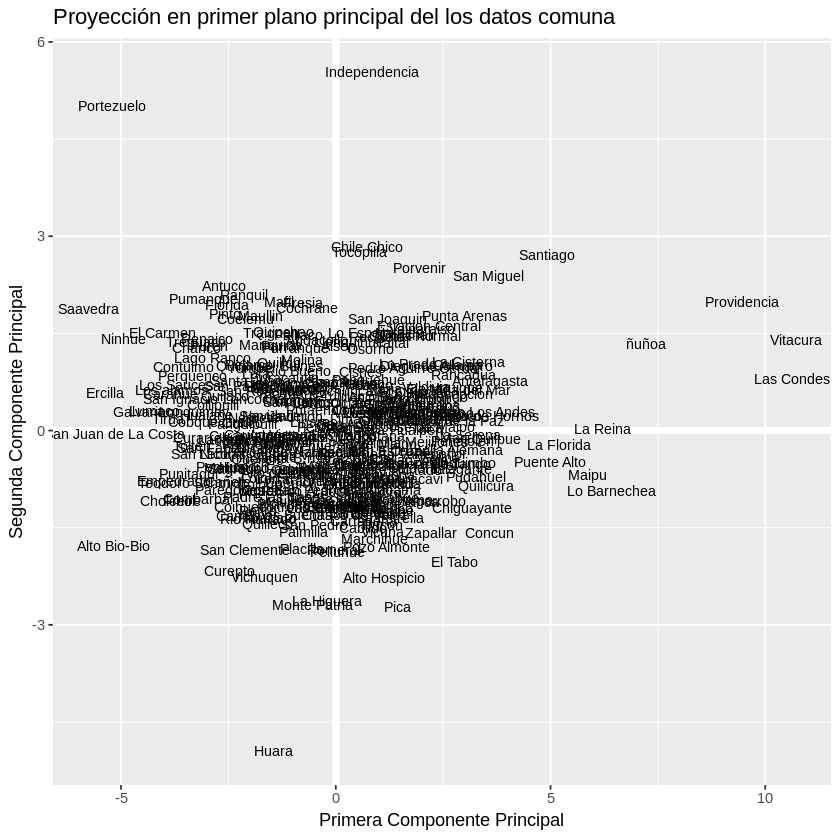

In [296]:
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = comuna), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos comuna")

[1] 0,47 0,11 0,10 0,08 0,07 0,05 0,04 0,04 0,03 0,01 0,00 0,00

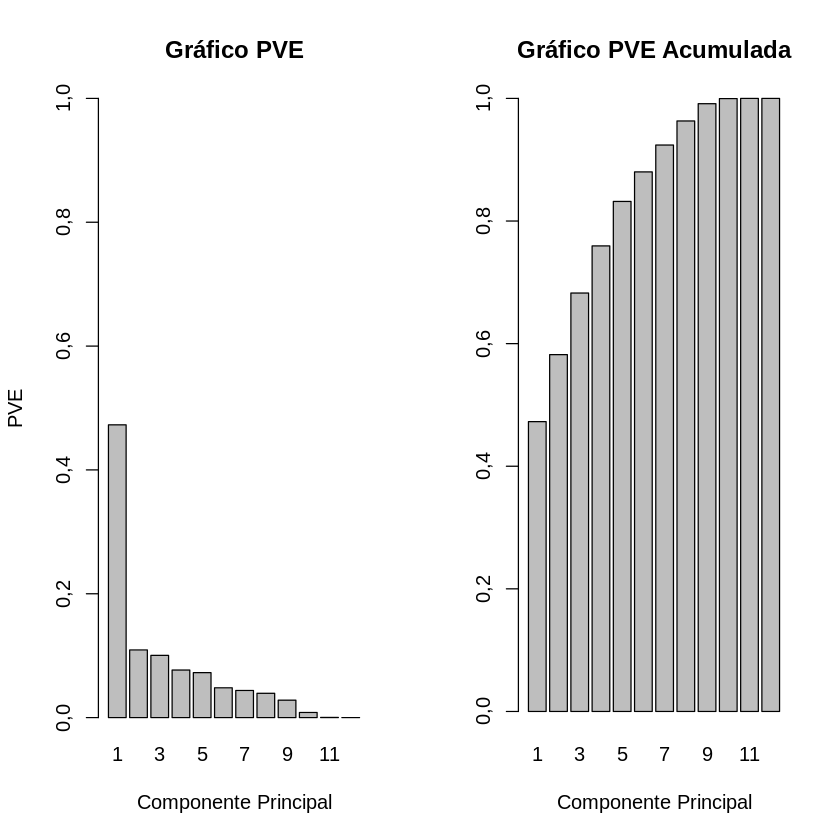

In [286]:
PVE <- comuna.eigen$values / sum(comuna.eigen$values)
round(PVE, 2)
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:12))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:12))


In [304]:
pca_datos <- prcomp(datos1, scale = TRUE) # prcomp centra variables para que tenga media cero, con scale = true se
                                           # busca que la desviacion estandar sea de uno
names(pca_datos)
pca_datos$sdev
pca_datos$rotation <- -pca_datos$rotation
pca_datos$center
pca_datos$scale
pca_datos$x <- -pca_datos$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 2,381911315 1,145126612 1,098105090 0,960237380 0,933282937 0,759991119
 [7] 0,725190107 0,686566939 0,581470855 0,315435409 0,061566504 0,004029302

Poblacion.miles.2011 
                                 52,3006192 
                                       IDSE 
                                  0,5444118 
      Ingresos.persona.Mens.miles...2006.11 
                                176,8643963 
                          Pobreza...2006.11 
                                 16,3439628 
                 Escolaridad..aØos..2006.11 
                                  9,0928793 
Material.Vivienda.bueno.o.acceptable...2006 
                                 79,5526316 
         Alcantarillado.o.Fosa.S.pt....2006 
                                 80,0315789 
     Esperanza.vida.al.nacer..aØos..2005.10 
                                 76,2222910 
                  X.ndice.Desarrollo.Humano 
                                  0,5026749 
                 Tasa.AVPP.x.1000.h.2007.11 
                                 80,0229102 
                   X..defunc..50..aØos.2011 
                                 76,2504644 
      Mortalidad.Infantil.x.1000.NV.2009.11 
                                  7,6993808

Poblacion.miles.2011 
                                 82,0871110 
                                       IDSE 
                                  0,1176646 
      Ingresos.persona.Mens.miles...2006.11 
                                104,3315201 
                          Pobreza...2006.11 
                                  7,3689705 
                 Escolaridad..aØos..2006.11 
                                  1,3196245 
Material.Vivienda.bueno.o.acceptable...2006 
                                  8,8252998 
         Alcantarillado.o.Fosa.S.pt....2006 
                                 15,9560516 
     Esperanza.vida.al.nacer..aØos..2005.10 
                                  2,0920728 
                  X.ndice.Desarrollo.Humano 
                                  0,1055873 
                 Tasa.AVPP.x.1000.h.2007.11 
                                 20,3745160 
                   X..defunc..50..aØos.2011 
                                  7,2770821 
      Mortalidad.Infantil.x.1000.NV.2009.11 
                                  3,9123470

In [306]:
pca_datos

Standard deviations (1, .., p=12):
 [1] 2,381911315 1,145126612 1,098105090 0,960237380 0,933282937 0,759991119
 [7] 0,725190107 0,686566939 0,581470855 0,315435409 0,061566504 0,004029302

Rotation (n x k) = (12 x 12):
                                                    PC1         PC2         PC3
Poblacion.miles.2011                         0,23669173  0,07791276  0,39840952
IDSE                                         0,40498019  0,17778103 -0,01501622
Ingresos.persona.Mens.miles...2006.11        0,31138396  0,19751911 -0,09046796
Pobreza...2006.11                           -0,28662067  0,05171890  0,19731039
Escolaridad..aØos..2006.11                   0,38148237  0,19493644  0,09072422
Material.Vivienda.bueno.o.acceptable...2006  0,24530170  0,30092886 -0,19541729
Alcantarillado.o.Fosa.S.pt....2006           0,32748660  0,14700947  0,11925474
Esperanza.vida.al.nacer..aØos..2005.10       0,24724383 -0,53272547  0,13109409
X.ndice.Desarrollo.Humano                    0,40588882 -0,1

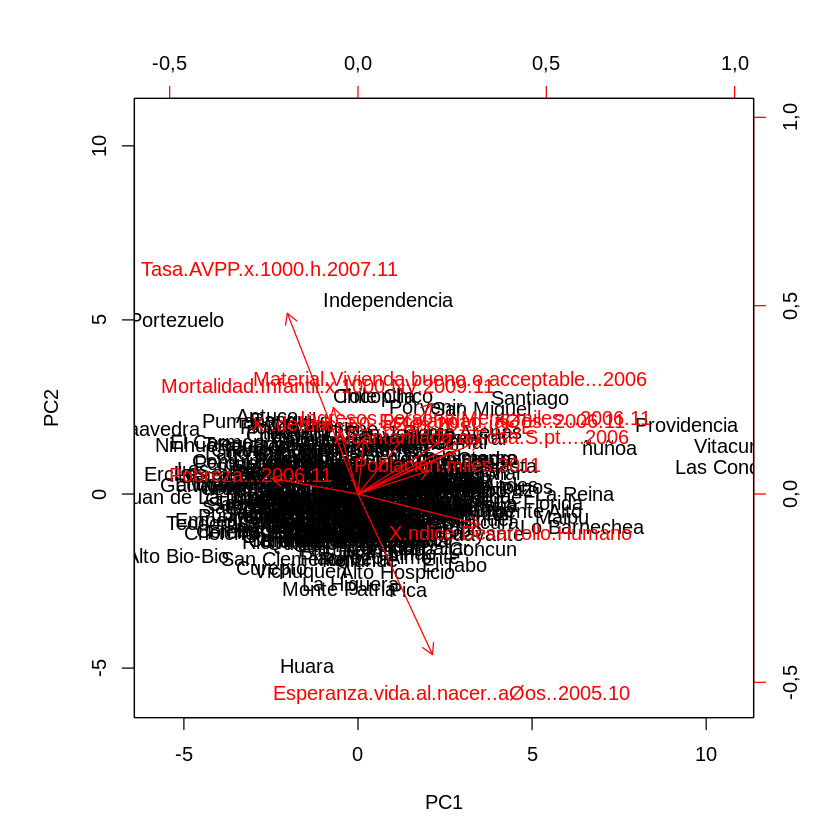

In [305]:
biplot(pca_datos, scale = 0)